In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

train_df = pd.read_csv('../input/titanic/train.csv')
test_df = pd.read_csv('../input/titanic/test.csv')
submission_df = pd.read_csv('../input/titanic/gender_submission.csv')

In [3]:
train_df.isnull().sum() #각 열의 결측치 체

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

얼마나 살아 있는 지?<br>
autopct : 파이 그래프에 표현을 어떻게 할 건지? 저기서는 소숫점 첫번째 자리까지<br>
explode : 중심에서 얼마나 벌어져 있을 것인지, 0은 0이고 1은 0.1만큼 벌어져있음<br>
shadow : 파이차트에 그림자가 생기게 됌

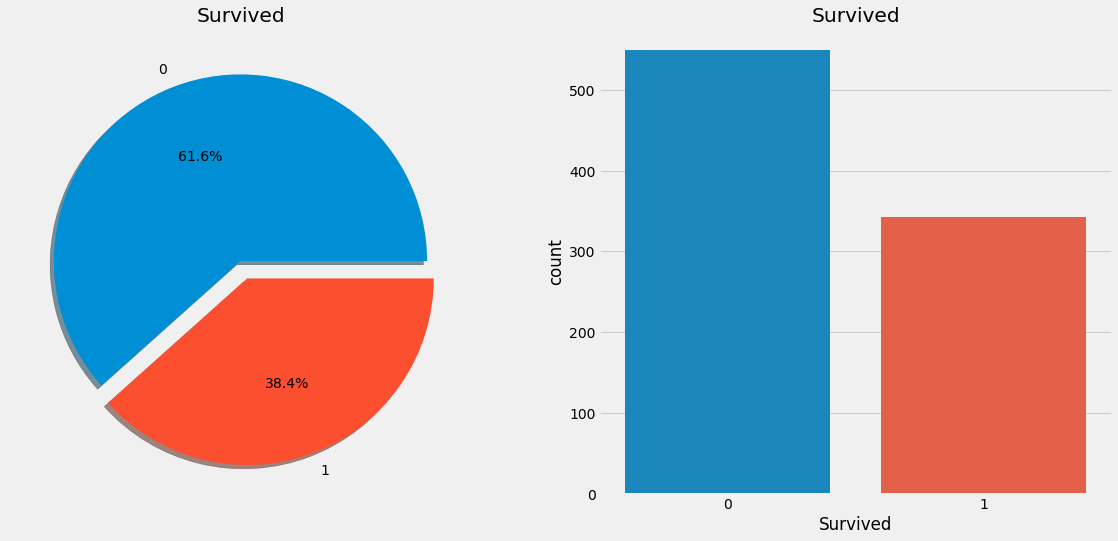

In [4]:
f, ax = plt.subplots(1, 2, figsize = (18, 8))
train_df['Survived'].value_counts().plot.pie(explode = [0, 0.1],
                                            autopct = '%1.1f%%',
                                            ax = ax[0], shadow = True)


ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data = train_df, ax = ax[1])
ax[1].set_title('Survived')
plt.show()

어떤 특징을 갖는 사람들이 살아남았는 지 확인해볼 필요성이 있음<br>
지금부터, 데이터셋에 Sex, Port Of Embarcation, Age 등과 같은 피쳐들을 사용해서 생존율을 계산해보려고 함.<br>

In [5]:
train_df.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

In [6]:
train_df[['Sex', 'Survived']].groupby(['Sex']).mean()

,Survived
Sex,
female,0.742038
male,0.188908


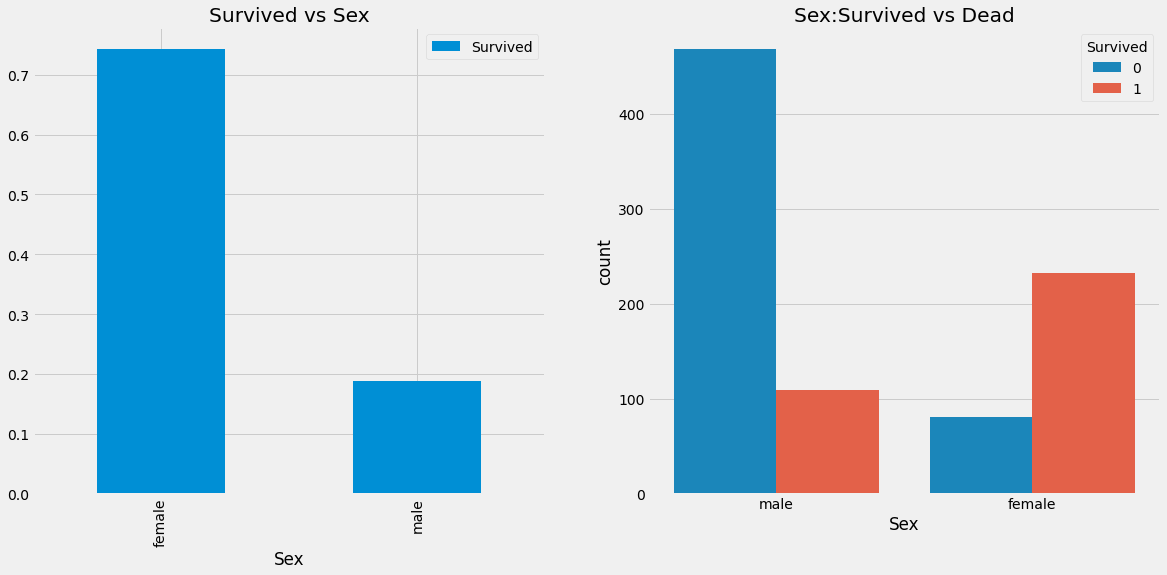

In [7]:
f, ax = plt.subplots(1, 2, figsize = (18, 8))
train_df[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax = ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue = 'Survived', data = train_df)
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

얻은 인사이트 : 약 75%의 여성이 survived가 1임. 이건 19% 정도에 해당하는 남성들과 비교됌. => 이건 모델링 하는 데 되게 중요한 부분이 될 것임

crosstab => 데이터에서 특정 컬럼에 대해 교차표를 만들어 줌<br>
margin = True 하면은 전체(All)에 대한 정보도 같이 나온다.

In [8]:
pd.crosstab(train_df.Pclass, train_df.Survived, margins = True).style.background_gradient(cmap = 'summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


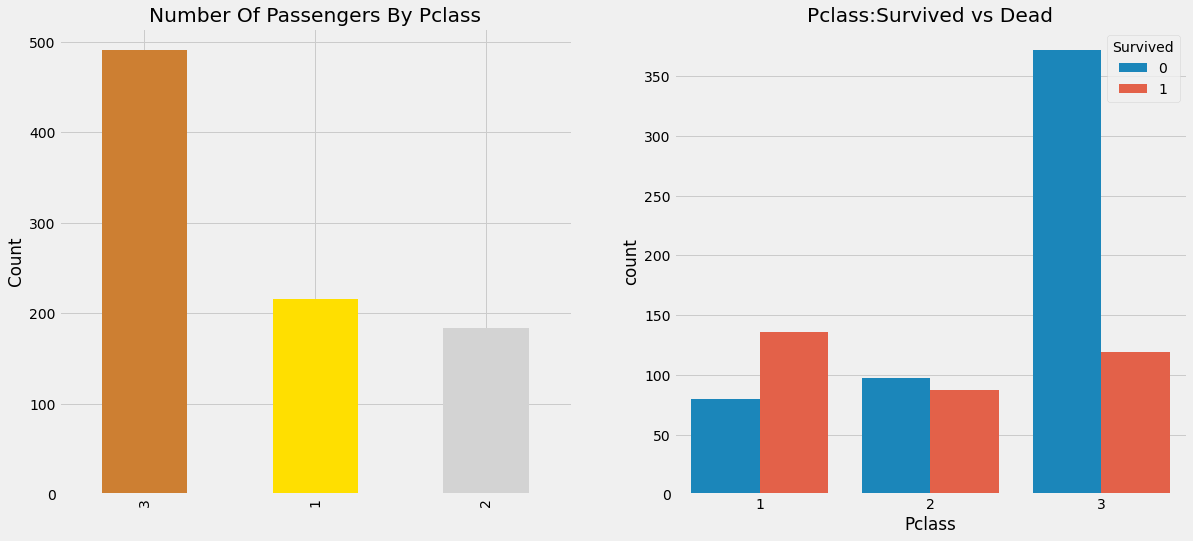

In [9]:
f, ax = plt.subplots(1, 2, figsize = (18, 8))
train_df['Pclass'].value_counts().plot.bar(color = 
                                          ['#CD7F32', '#FFDF00', '#D3D3D3'],
                                          ax = ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot('Pclass', hue = 'Survived', data = train_df, ax = ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

얻은 인사이트 : Pclass가 1로 갈수록 돈이 많은 사람들인데, 이 사람들이 구조 우선순위가 1순위었다는 것을 알 수 있었음.

In [10]:
pd.crosstab([train_df['Sex'], train_df['Survived']],
           train_df['Pclass'], margins = True).style.background_gradient(cmap = 'summer_r')


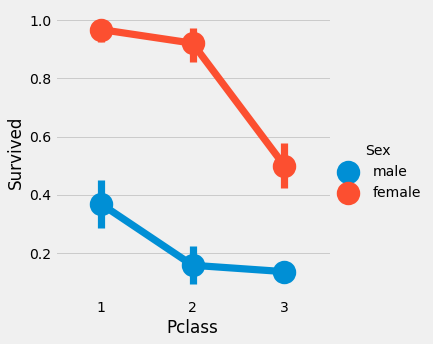

In [11]:
sns.factorplot('Pclass', 'Survived', hue = 'Sex', data = train_df)

인사이트 : 여성은 사실 보니까 pclass에 관계없이 애초에 우선순위가 높았다.

Age feature -> Continuous Feature

In [12]:
print('Oldest Passenger was of : ', train_df.Age.max(), 'Years')
print('Youngest Passenger was of : ', train_df['Age'].min(), 'Years')
print('Average Age on the ship:', train_df['Age'].mean(), 'Years')

Oldest Passenger was of :  80.0 Years
Youngest Passenger was of :  0.42 Years
Average Age on the ship: 29.69911764705882 Years


violinplot => split = True 집어 넣으면 분리 안시킨다고 보면 됌.<br>
왼쪽이 split = True 없앤 거고 오른쪽이 있는 것

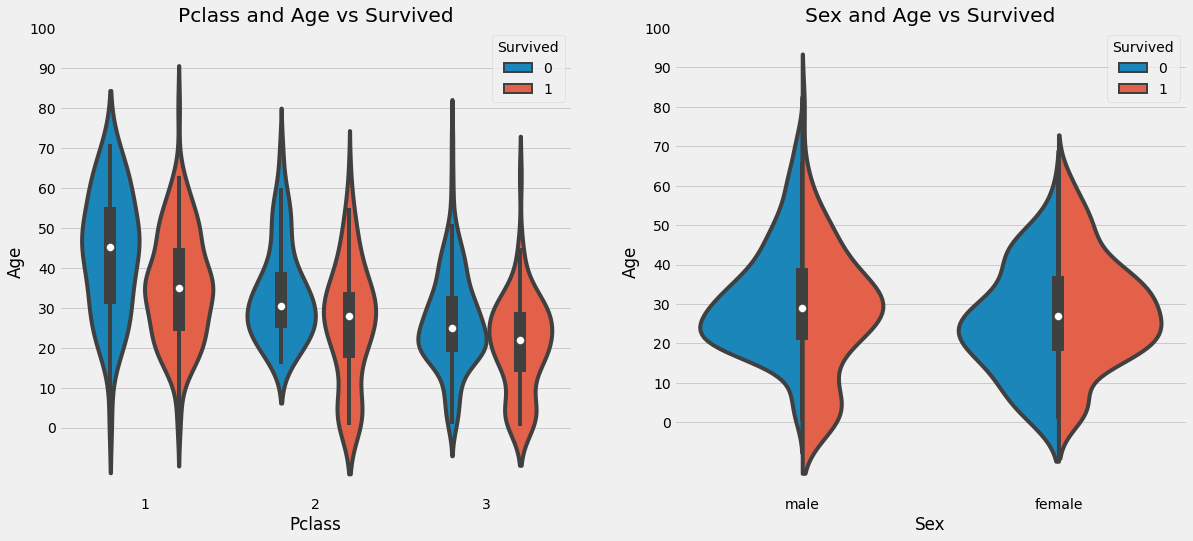

In [13]:
f, ax = plt.subplots(1, 2, figsize = (18, 8))
sns.violinplot("Pclass", "Age", hue = "Survived", data = train_df,
               ax = ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))
sns.violinplot("Sex", "Age", hue = "Survived", data = train_df,
              split = True, ax = ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))
plt.show()

얻은 인사이트<br>
1. Pclass가 3으로 갈수록 어린 사람들의 비율이 늘어남.(이건 잘 모르겠네 ;)
그러나, 10살 이하의 children일 수록 생존 비율이 잠시 높은 것을 알 수 있음<br>
2. 20~50살의 Pclass 1에 있는 사람들의 생존 비율이 높은 것을 알 수 있고, 여성 같은 경우엔 더 높음<br>
3. 남성에 한해서는, 나이가 높아질 수록 생존가능성이 떨어짐

결측치를 처리해야 하는데, 나이를 모두 평균값으로 대체하는 것은 무리가 있을 수도 있음.
나이대 분포가 되게 다양할 텐데, 그럼 그 사람의 나이를 어떻게 추론할 수 있을까?<br>
=> 이름으로 추론하는 게 가능해질듯. mr이냐 mrs이냐

In [14]:
train_df['Initial']=0
for i in train_df:
    train_df['Initial']=train_df.Name.str.extract('([A-Za-z]+)\.')

In [15]:
pd.crosstab(train_df['Initial'], train_df['Sex']).T.style.background_gradient(cmap = 'summer_r')


Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


스펠링이 잘못된 것이 있는 것 같음


In [16]:
train_df['Initial'].\
replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [17]:
train_df.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [18]:
train_df.loc[(train_df['Age'].isnull()) & (train_df['Initial'] == 'Mr'), 'Age'] = 33
train_df.loc[(train_df['Age'].isnull()) & (train_df['Initial'] == 'Mrs'), 'Age'] = 36
train_df.loc[(train_df['Age'].isnull()) & (train_df['Initial'] == 'Master'), 'Age'] = 5
train_df.loc[(train_df['Age'].isnull()) & (train_df['Initial'] == 'Miss'), 'Age'] = 22
train_df.loc[(train_df['Age'].isnull()) & (train_df['Initial'] == 'Other'), 'Age'] = 46

In [19]:
train_df.Age.isnull().any()

False

xticks : 눈금 표시하기
bins : 계급 구간 나누기

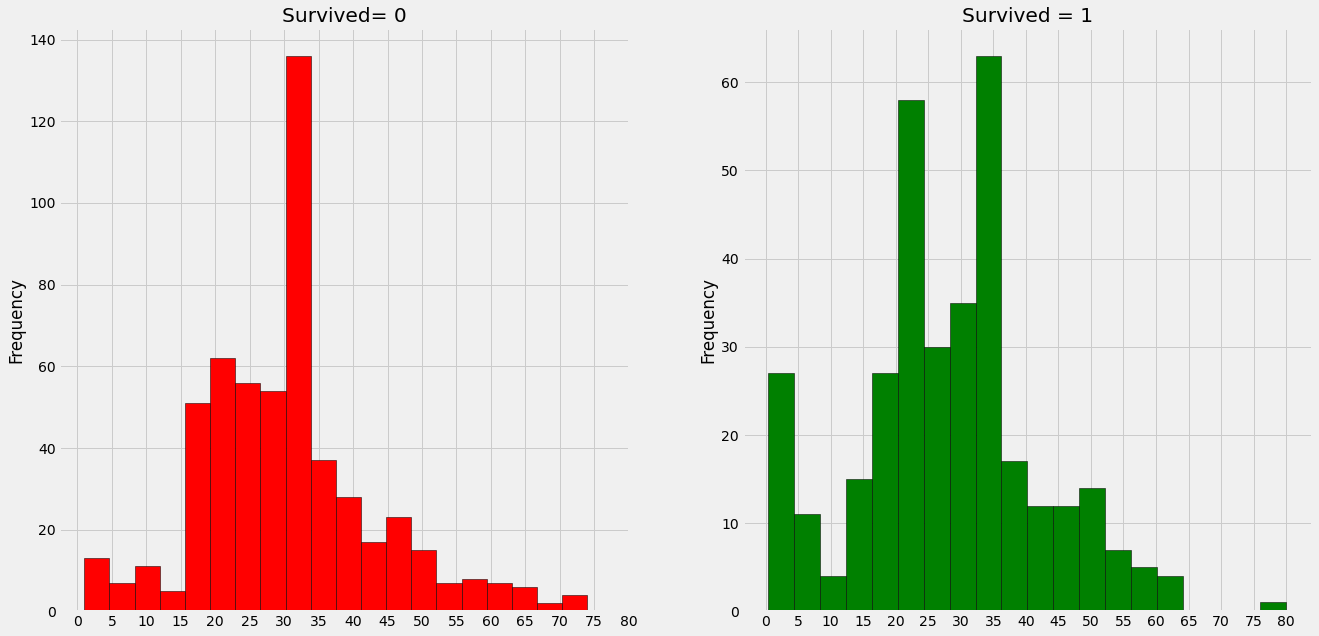

In [20]:
f, ax = plt.subplots(1, 2, figsize = (20, 10))
train_df[train_df['Survived'] == 0]['Age'].plot.hist(ax = ax[0],
                                                     bins = 20, edgecolor = 'black', color = 'red')
ax[0].set_title('Survived= 0')
x1 = list(range(0, 85, 5))
ax[0].set_xticks(x1)

train_df[train_df['Survived'] == 1]['Age'].plot.hist(ax = ax[1], color = 'green',
                                                    bins = 20, edgecolor = 'black')
ax[1].set_title('Survived = 1')
x2 = list(range(0, 85, 5))
ax[1].set_xticks(x2)
plt.show()

얻은 인사이트 
1. 5세 미만 아이들 생존 비율이 높음(The Women and Child First Policy)
2. 80살 어른분 생존
3. 30~40세 사람들의 사망 비율이 가장 높음

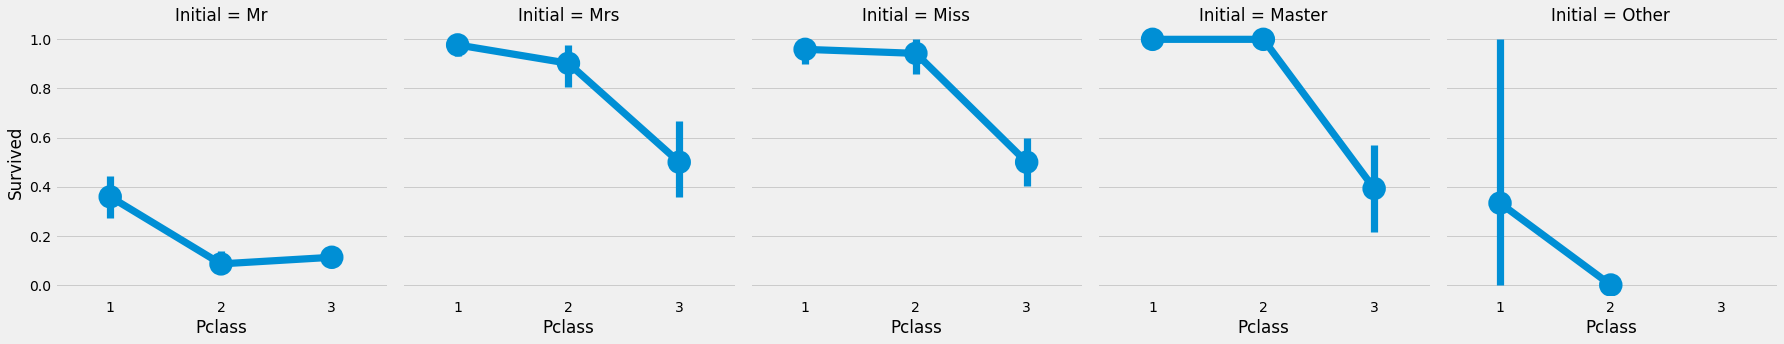

In [21]:
sns.factorplot('Pclass', 'Survived', col = 'Initial', data = train_df)
plt.show()

여성, 어린이 우선 정책에 따라서 여성의 생존 비율이 전체적으로 높게 나타났음

In [22]:
pd.crosstab([train_df.Embarked, train_df.Pclass],
           [train_df.Sex, train_df.Survived], margins = True).style.\
background_gradient(cmap = 'summer_r')

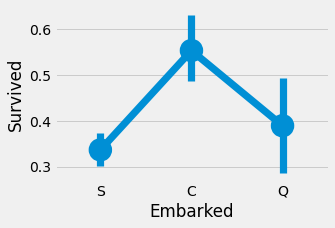

In [23]:
sns.factorplot('Embarked', 'Survived', data= train_df)
fig = plt.gcf() #gcf = get the current figure
fig.set_size_inches(5, 3) #그림의 크기 
plt.show()

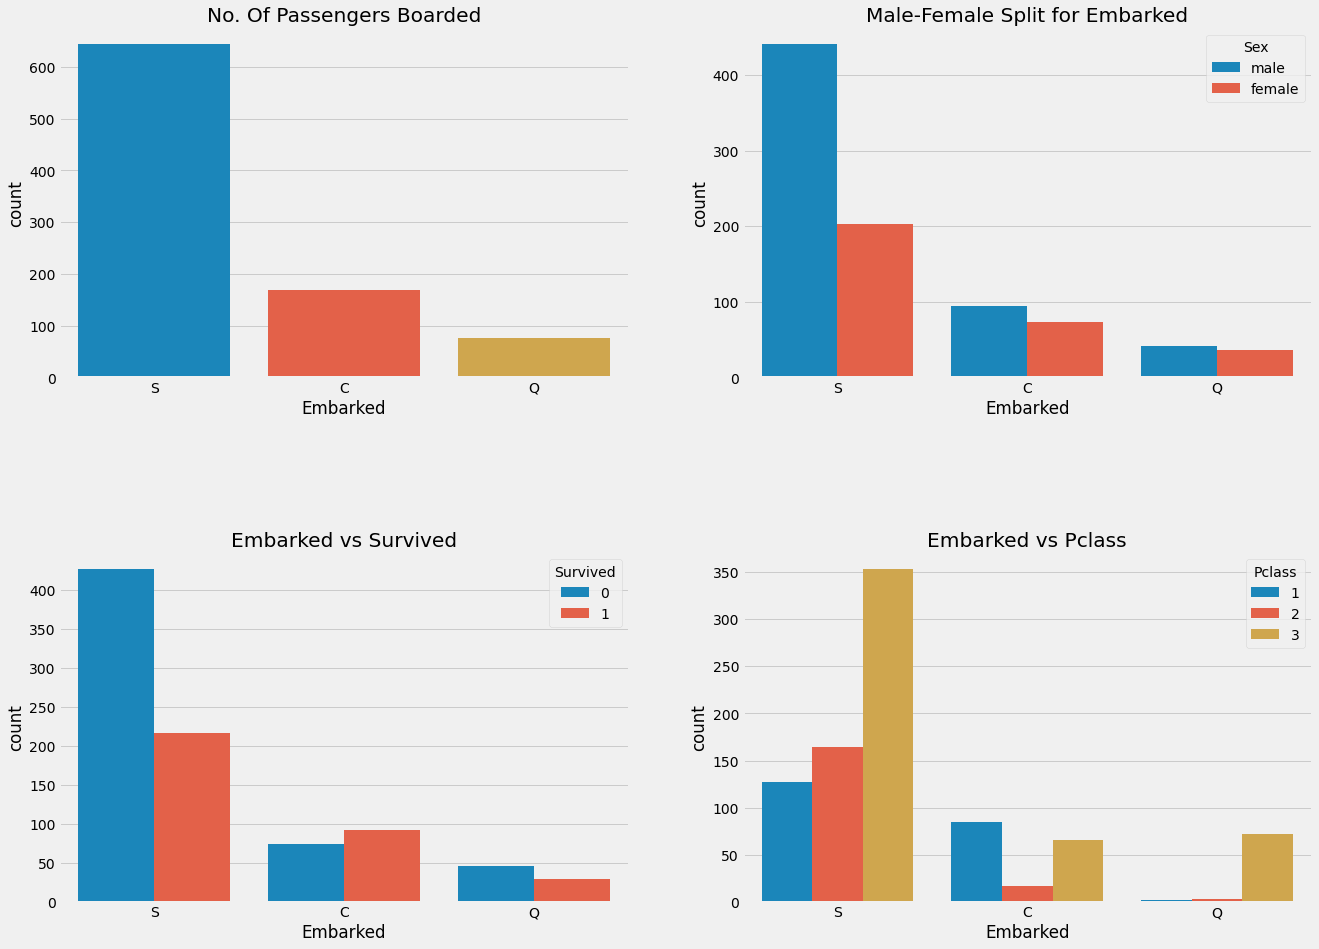

In [24]:
f,ax=plt.subplots(2,2,figsize=(20,15))
sns.countplot('Embarked',data=train_df,ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')
sns.countplot('Embarked',hue='Sex',data=train_df,ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')
sns.countplot('Embarked',hue='Survived',data=train_df,ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')
sns.countplot('Embarked',hue='Pclass',data=train_df,ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

얻은 인사이트 
1. 가장 많은 Embarked가 S => 대부분의 사람들은 Pclass가 3임
2. Embarked가 C인 사람들의 생존 비율이 눈에 띔. 이건 아무래도 Pclass1, Pclass2 비율을 같이 고려해봐야 할 거 같음
3. Q에 있는 사람들의 95%가 Pclass가 3임
4. 그러나, 여전히 S에 있던 사람들의 Pclass1 비율이 가장 높은 것을 확인할 수 있음.

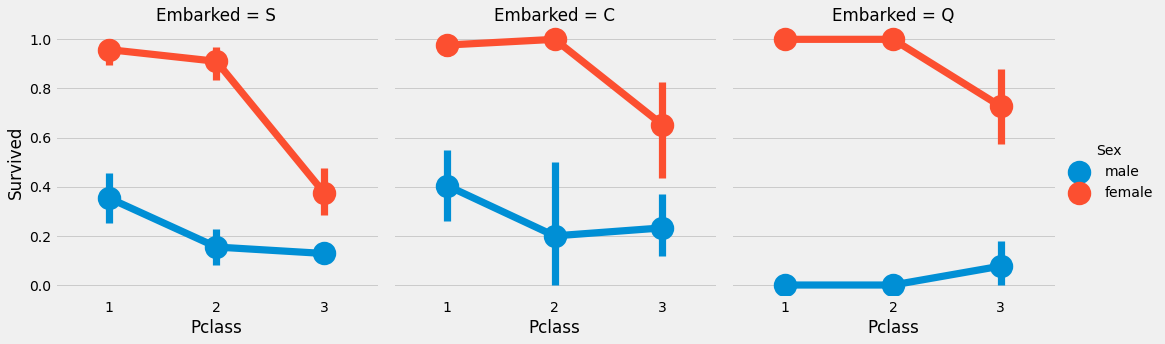

In [25]:
sns.factorplot('Pclass', 'Survived', hue = 'Sex', col = 'Embarked', data = train_df)
plt.show()

얻은 인사이트
1. Pclass1, Pclass2에 있던 여성의 생존비율이 거의 100%임.
2. Embarked S에 있던 사람들은 되게 불운함. => 왜냐하면, 여성인데도 불구하고 생존 비율이 다른 것에 비해 되게 낮음(돈 문제)
3. Embarked Q는 남성에게 되게 불운함. => 대부분이 Pclass 3이어가지고 그런 거 같음

In [26]:
train_df['Embarked'].fillna('S', inplace = True) # 최빈값으로 결측치 대체
train_df['Embarked'].isnull().any()

False

SibSip -> Discrete Feature => 외동인지 아닌지 판별함<br>
Sibling = brother, sister, stepbrother, stepsister<br>
spouse = husband, wife

In [27]:
pd.crosstab(train_df.SibSp, train_df.Survived).style.background_gradient(cmap = 'summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


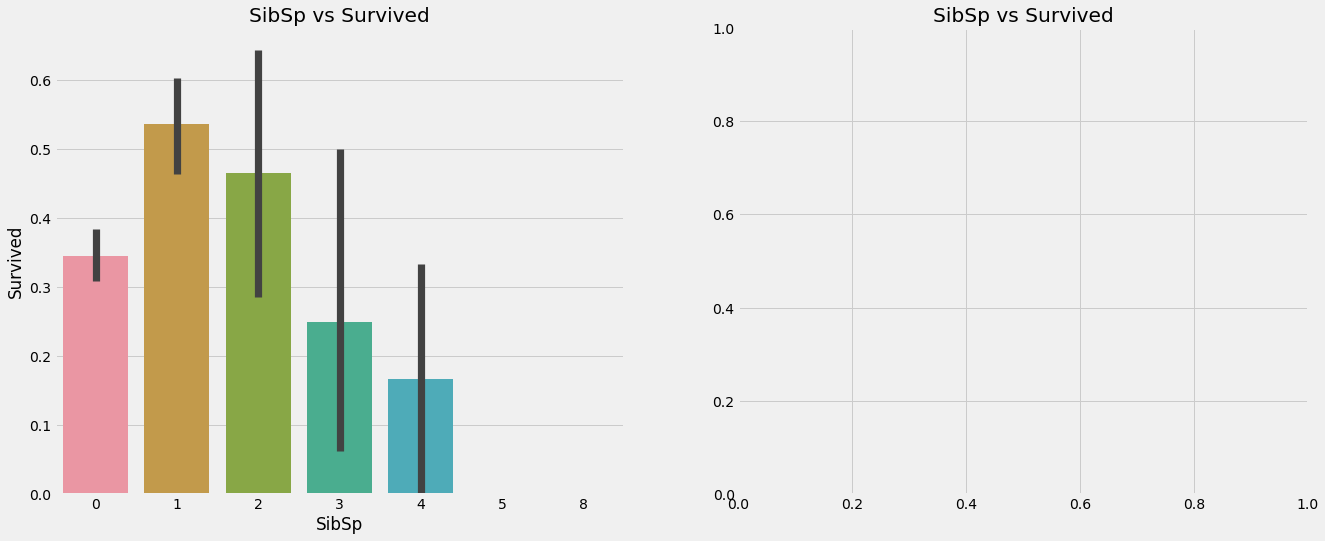

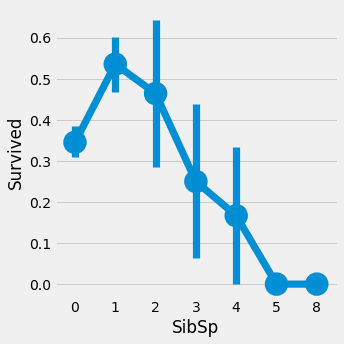

In [28]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot('SibSp','Survived',data=train_df,ax=ax[0])
ax[0].set_title('SibSp vs Survived')
sns.factorplot('SibSp','Survived',data=train_df,ax=ax[1])
ax[1].set_title('SibSp vs Survived')
plt.show()

In [29]:
pd.crosstab(train_df.SibSp, train_df.Pclass).style.background_gradient(cmap = 'summer_r')


Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


얻은 인사이트
1. 형제자매가 1명이거나, 혼자인 경우에 34.5%가 생존함
2. 형제자매가 늘어나면 늘어날수록 생존율이 떨어짐 => 가족이라서 혼자나가려고 안함
<br>특히나 SibSp >= 4인 경우에 생존율이 0인데, 이것은 Pclass 때문일 가능성이 높다.

In [30]:
pd.crosstab(train_df['Parch'], train_df['Pclass']).\
style.background_gradient(cmap = 'summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


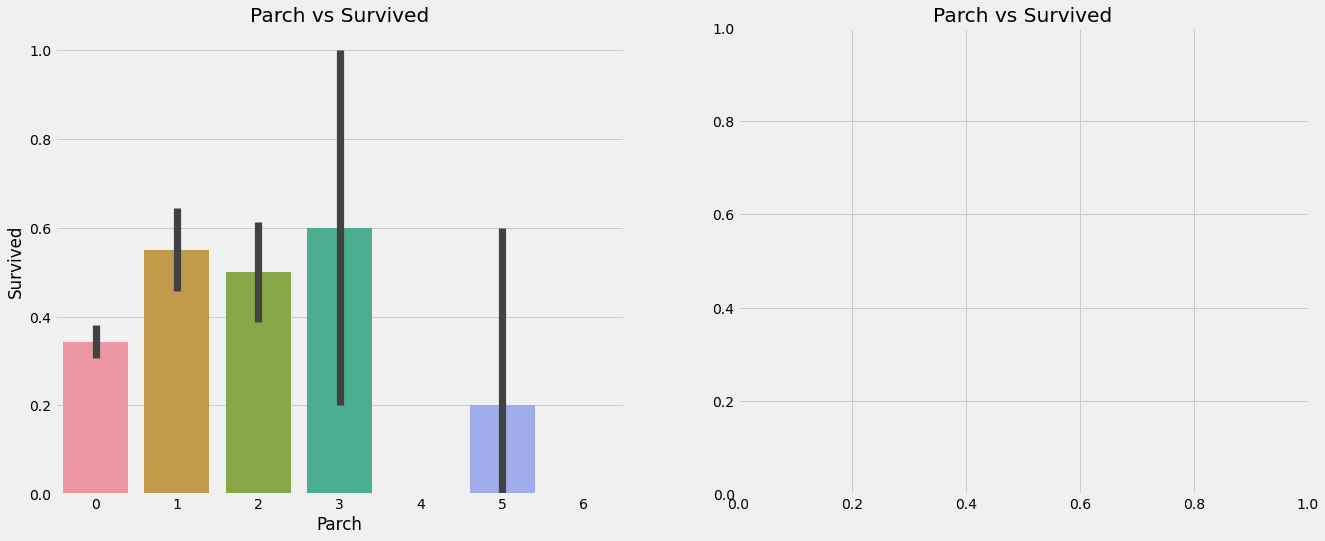

In [31]:
f,ax=plt.subplots(1, 2, figsize=(20,8))
sns.barplot('Parch','Survived',data=train_df,ax=ax[0])
ax[0].set_title('Parch vs Survived')

sns.factorplot('Parch','Survived',data=train_df,ax=ax[1])
ax[1].set_title('Parch vs Survived')
plt.close(2)
plt.show()

얻은 인사이트
1. 부모님과 함께 탑승한 사람들은 생존율이 높다. 더 많아지면 낮아진다.
2. 부모님과 함께 탑승하지 않았거나, 4명 이상이되면 생존율이 떨어진다.

In [32]:
print('Highest Fare was: ', train_df['Fare'].max())
print('Lowest Fare was: ', train_df['Fare'].min())
print('Average Fare was: ', train_df['Fare'].mean())

Highest Fare was:  512.3292
Lowest Fare was:  0.0
Average Fare was:  32.204207968574636


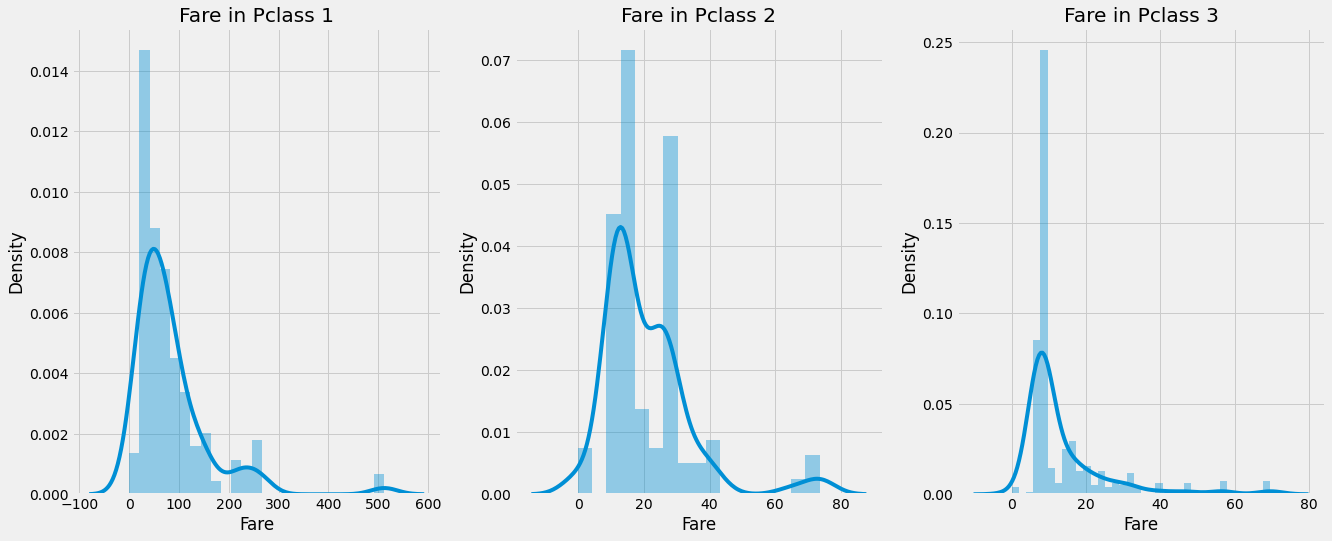

In [33]:
f, ax = plt.subplots(1, 3, figsize = (20, 8))
sns.distplot(train_df[train_df['Pclass'] == 1].Fare, ax = ax[0])
ax[0].set_title('Fare in Pclass 1')
sns.distplot(train_df[train_df['Pclass'] == 2].Fare, ax = ax[1])
ax[1].set_title('Fare in Pclass 2')
sns.distplot(train_df[train_df['Pclass'] == 3].Fare, ax = ax[2])
ax[2].set_title('Fare in Pclass 3')
plt.show()

얻은 인사이트의 대략적인 결론
1. Sex : 여성이 남성보다 생존 비율이 높음<br>
2. Pclass : 1일수록 생존율 더 높고, 특히나 여성이면 더더욱 그럼<br>
3. Age : 어린이면 생존율 더 높음. 20-30대 사람들의 사망 비율이 높음<br>
4. Embarked : C에서 탑승한 사람들의 생존율이 두드러짐. <br>
5. Parch + SibSp : 1 - 2명의 형재자매나, 1~3명의 부모님과 함께 탑승하는 경우에 생존율이 더 높음

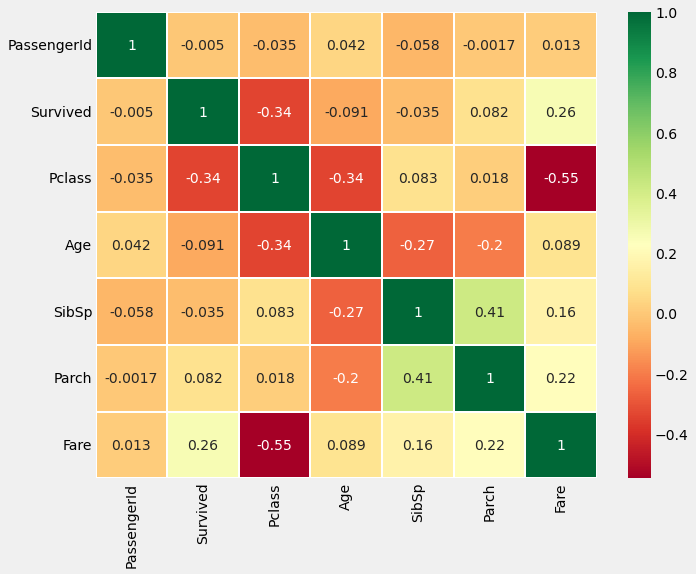

In [34]:
sns.heatmap(train_df.corr(), annot = True, cmap = 'RdYlGn', linewidths = .2)
# annot = True : 상관관계 숫자 넣기
fig = plt.gcf()
fig.set_size_inches(10, 8)
plt.show()

히트맵 해석하기
1. 오로지 숫자형 변수들에 대해서만 상관관계 해석이 가능하다
2. 양의 상관관계와 음의 상관관계에 맞춰서 해석하기
if. 상관관계가 매우 높다면?<br>
=> 서로의 피쳐가 관계가 매우 높다는 거임. 그 뜻은, 비슷하다는 이야기이고, 되게 낮은 분산을 가질 것임. 이것은 다중공선성 문제 발생함.<br>
이런 부분들은 하나의 피쳐를 제거해주는 것이 더 좋다는 말임.<br>
제거하는 이유 : 학습시간 단축하고 장점을 얻을 수 있음. 물론 위 상관관계에서는 0.41이 최대라서 그렇게 높은 상관관계는 아님

<h3> Part2. Feature Engineering and Data Cleaning</h3>

<h5> Feature Engineering </h5> 
우리의 데이터에 있는 모든 컬럼이 중요하진 않을 거임. 수많은 불필요한 피쳐가 있을 거고 그것은 제거해주는 것이 더 좋다고 판단이 됌. 또한, 유의미한 변수를 추가로 넣을 수도 있는 것임.

In [35]:
#1. Age Column을 Binning을 이용하여 묶기
train_df['Age_band'] = 0
train_df.loc[train_df.Age <= 16, 'Age_band'] = 0
train_df.loc[(train_df.Age > 16) & (train_df.Age <= 32), 'Age_band'] = 1
train_df.loc[(train_df.Age > 32) & (train_df.Age <= 48), 'Age_band'] = 2
train_df.loc[(train_df.Age > 48) & (train_df.Age <= 64), 'Age_band'] = 3
train_df.loc[(train_df.Age > 64), 'Age_band'] = 4
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,2


In [36]:
#to_frame : 시리즈를 데이터프레임으로 변환함
train_df['Age_band'].value_counts().to_frame().style.background_gradient(cmap = 'summer')

,Age_band
1,382
2,325
0,104
3,69
4,11


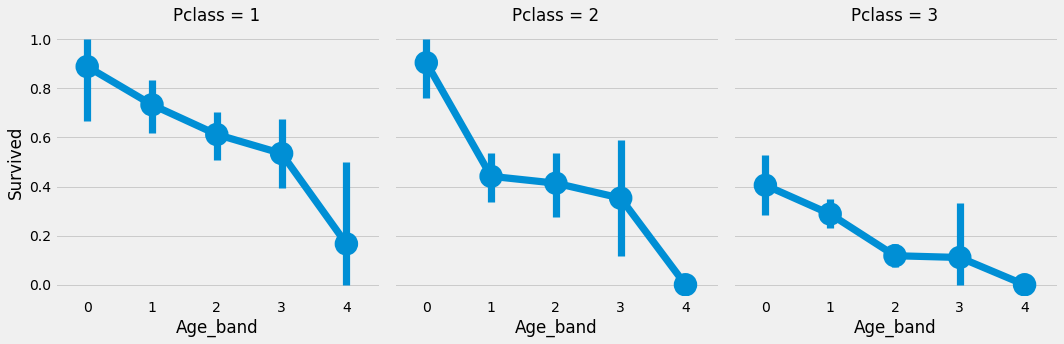

In [37]:
sns.factorplot('Age_band', 'Survived', data = train_df, col = 'Pclass')

얻은 인사이트 <br>
Pclass에 상관없이 나이가 많을수록 생존율이 떨어짐<br><br>
<h4> 또 하나의 파생변수 생성</h4>

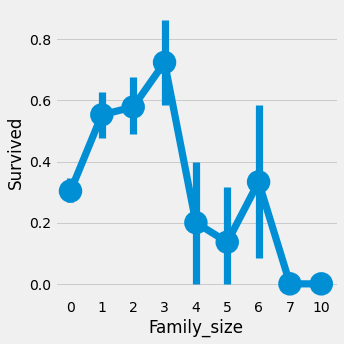

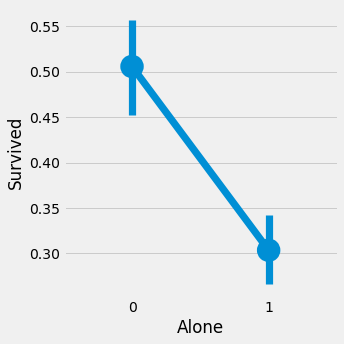

In [38]:
train_df['Family_size'] = 0
train_df['Family_size'] = train_df['Parch'] + train_df['SibSp']
train_df['Alone'] = 0
train_df.loc[train_df.Family_size == 0, 'Alone'] = 1

f, ax = plt.subplots(1, 2, figsize = (18, 6))
sns.factorplot('Family_size', 'Survived', data = train_df, ax = ax[0])
ax[0].set_title('Family_Size vs Survived')
sns.factorplot('Alone', 'Survived', data = train_df, ax = ax[1])
ax[1].set_title('Alone vs Survived')
plt.close(1)
plt.show()

얻은 인사이트<br>
1. Family_size = 0인게 alone이라는 이야긴데, 아까 이야기했던 대로 alone이면 생존율이 낮아짐. 또한, family_size가 4보다 커지면 더 낮아짐

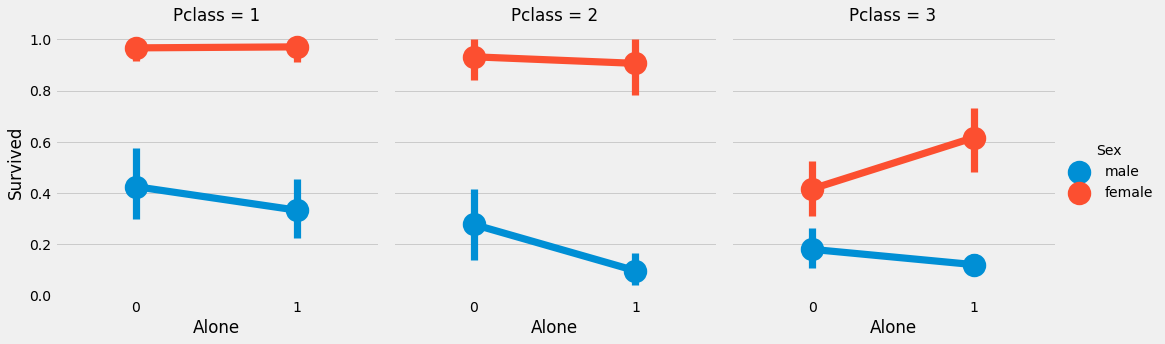

In [39]:
sns.factorplot('Alone','Survived',data=train_df,hue='Sex',col='Pclass')
plt.show()

Fare_Range 역시 continuous features이라서 ordinal value로 전환 시도

In [40]:
#qcut => 연속형 변수의 구간을 n개만큼 쪼개줌
train_df['Fare_Range'] = pd.qcut(train_df['Fare'], 4)
train_df.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.\
background_gradient(cmap = 'summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


얻은 인사이트<br>
돈 많을수록 생존율 높아짐

In [41]:
train_df['Fare_cat'] = 0
train_df.loc[train_df['Fare'] <= 7.91, 'Fare_cat'] = 0
train_df.loc[(train_df.Fare > 7.91) & (train_df.Fare <= 14.454), 'Fare_cat'] = 1
train_df.loc[(train_df.Fare > 14.454) & (train_df.Fare <= 31), 'Fare_cat'] = 2
train_df.loc[(train_df.Fare > 31) & (train_df.Fare <= 513), 'Fare_cat'] = 3

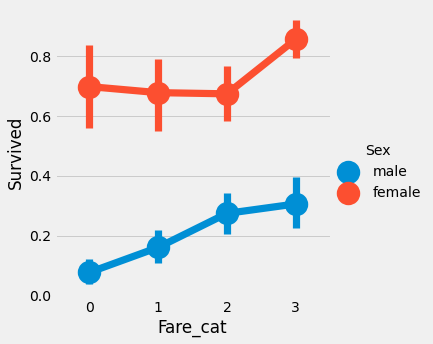

In [42]:
sns.factorplot('Fare_cat', 'Survived', data = train_df, hue = 'Sex')
plt.show()

String values => Numeric으로 바꾸기 <br>
머신러닝 모델을 문자열 받지 못함.

In [43]:
#C가 생존율이 높다고 2로 매핑한 게 아님. 그냥 매핑하면 됌
train_df['Sex'].replace(['male', 'female'], [0, 1], inplace= True)
train_df['Embarked'].replace(['S', 'C','Q'], [0, 1, 2], inplace = True)
train_df['Initial'].replace(['Mr', 'Mrs', 'Miss', 'Master', 'Other'],
                           [0, 1, 2, 3, 4], inplace= True)

불필요한 컬럼명 삭제 => Name, Age, Ticket, Fare, Cabin, Fare_Range, PassengerId <br>
이 컬럼들은 관련된 파생변수를 생성했기 때문에 굳이 또 할 필요가 업승ㅁ

In [44]:
train_df.drop(['Name', 'Age', 'Ticket', 'Fare', 'Cabin',
              'Fare_Range', 'PassengerId'], axis = 1, inplace= True)

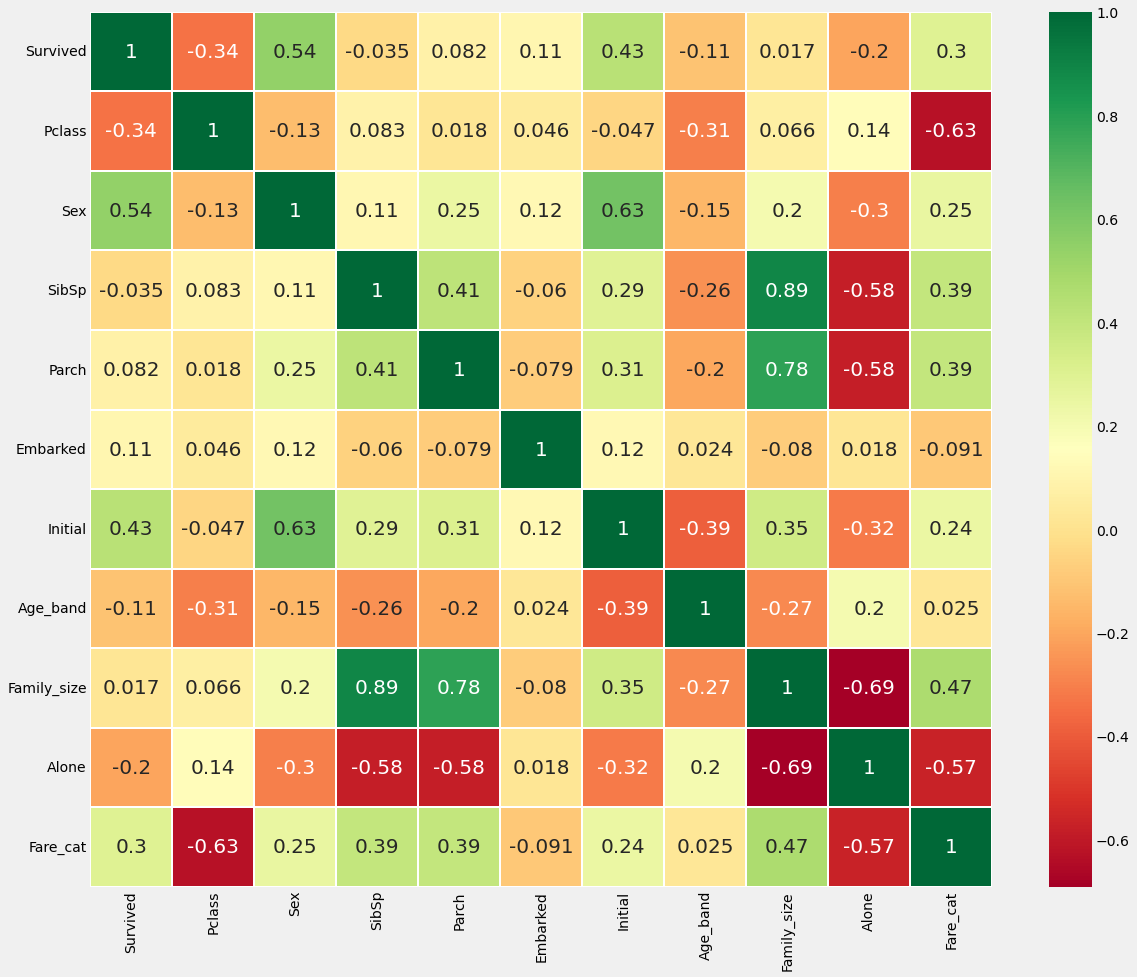

In [45]:
sns.heatmap(train_df.corr(), annot = True, cmap = 'RdYlGn', 
           linewidths = 0.2, annot_kws = {'size' : 20})
fig = plt.gcf()
fig.set_size_inches(18, 15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

<h3> Part3. Predictive Modeling

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [47]:
train, test = train_test_split(train_df, test_size = 0.3,
                              random_state = 0, stratify = train_df['Survived'])

train_X = train[train.columns[1:]]
train_Y = train[train.columns[:1]]
test_X = test[test.columns[1:]]
test_Y = test[test.columns[:1]]
X = train_df[train_df.columns[1:]]
Y = train_df['Survived']

In [48]:
model = svm.SVC(kernel = 'rbf', C = 1, gamma = 0.1)
model.fit(train_X, train_Y)
prediction1 = model.predict(test_X)
print('Accracy for rbf SVM is ' , metrics.accuracy_score(prediction1, test_Y))

Accracy for rbf SVM is  0.835820895522388


In [49]:
model = svm.SVC(kernel = 'rbf', C = 0.1, gamma = 0.1)
model.fit(train_X, train_Y)
prediction2 = model.predict(test_X)
print('Accracy for rbf SVM is ' , metrics.accuracy_score(prediction2, test_Y))

Accracy for rbf SVM is  0.832089552238806


In [50]:
model = LogisticRegression()
model.fit(train_X,train_Y)
prediction3=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction3,test_Y))

The accuracy of the Logistic Regression is 0.8134328358208955


In [51]:
model=DecisionTreeClassifier()
model.fit(train_X,train_Y)
prediction4=model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction4,test_Y))

The accuracy of the Decision Tree is 0.8022388059701493


In [52]:
model=KNeighborsClassifier() 
model.fit(train_X,train_Y)
prediction5=model.predict(test_X)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction5,test_Y))

The accuracy of the KNN is 0.8134328358208955


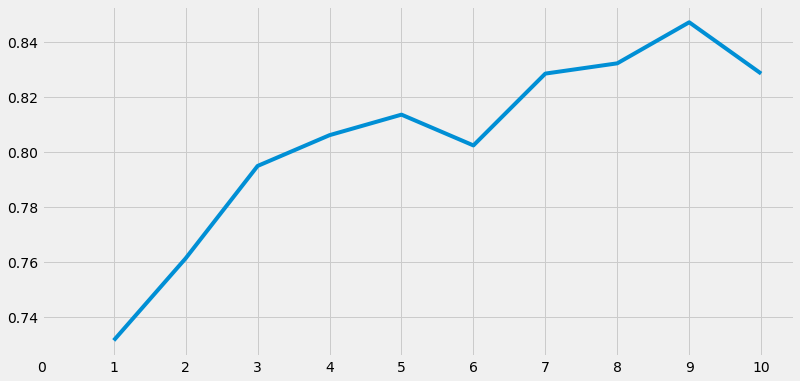

Accuracies for different values of n are: [0.73134328 0.76119403 0.79477612 0.80597015 0.81343284 0.80223881
 0.82835821 0.83208955 0.84701493 0.82835821] with the max value as  0.8470149253731343


In [53]:
a_index = list(range(1, 11))
a = pd.Series()
x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
for i in list(range(1, 11)):
    model = KNeighborsClassifier(n_neighbors = i)
    model.fit(train_X, train_Y)
    prediction = model.predict(test_X)
    a = a.append(pd.Series(metrics.accuracy_score(prediction, test_Y)))
    
plt.plot(a_index, a)
plt.xticks(x)
fig = plt.gcf()
fig.set_size_inches(12, 6)
plt.show()
print('Accuracies for different values of n are:',a.values,'with the max value as ',a.values.max())

In [54]:
model=GaussianNB()
model.fit(train_X,train_Y)
prediction6=model.predict(test_X)
print('The accuracy of the NaiveBayes is',metrics.accuracy_score(prediction6,test_Y))

The accuracy of the NaiveBayes is 0.8134328358208955


In [55]:
model=RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_Y)
prediction7=model.predict(test_X)
print('The accuracy of the Random Forests is',metrics.accuracy_score(prediction7,test_Y))

The accuracy of the Random Forests is 0.8246268656716418


Cross Validation 하기<br>
각 피쳐간 불균형이 있을 수도 있음<br>

In [56]:
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict

kfold = KFold(n_splits = 10, random_state = 22, shuffle = True)
xyz = []
accuracy = []
std = []
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree','Naive Bayes','Random Forest']
models = [svm.SVC(kernel = 'linear'), svm.SVC(kernel = 'rbf'),
         LogisticRegression(), KNeighborsClassifier(n_neighbors = 9),
         DecisionTreeClassifier(), GaussianNB(), RandomForestClassifier(n_estimators = 100)]

for i in models:
    model = i
    cv_result = cross_val_score(model, X, Y, cv = kfold, scoring = 'accuracy')
    cv_result = cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)

new_models_dataframe2 = pd.DataFrame({'CV Mean' : xyz, 'Std' : std},
                                    index = classifiers)
new_models_dataframe2

,CV Mean,Std
Linear Svm,0.784607,0.057841
Radial Svm,0.828377,0.057096
Logistic Regression,0.799176,0.040154
KNN,0.808140,0.035630
Decision Tree,0.803608,0.045489
Naive Bayes,0.795843,0.054861
Random Forest,0.818240,0.047856


<AxesSubplot:>

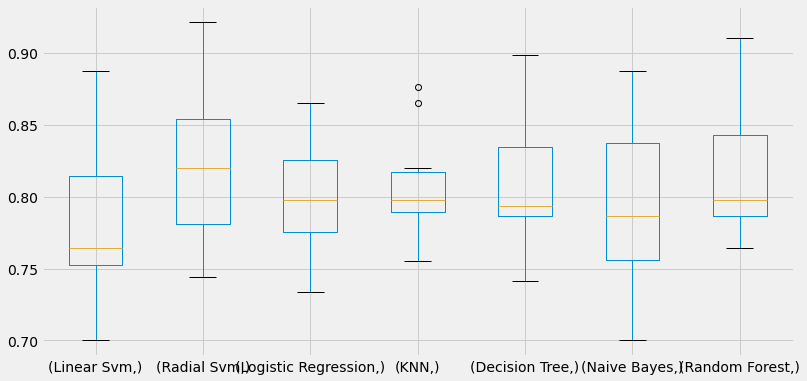

In [57]:
plt.subplots(figsize = (12, 6))
box = pd.DataFrame(accuracy, index = [classifiers])
box.T.boxplot()

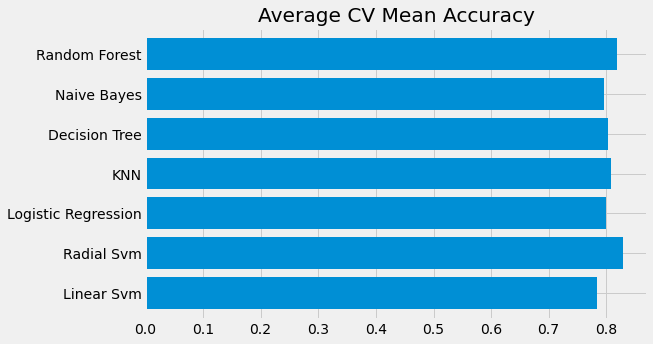

In [58]:
new_models_dataframe2['CV Mean'].plot.barh(width = 0.8)
plt.title('Average CV Mean Accuracy')
fig = plt.gcf()
fig.set_size_inches(8, 5)
plt.show()

cross_val_predict : 모든 fold에 대해서 예측을 진행하면서 간다

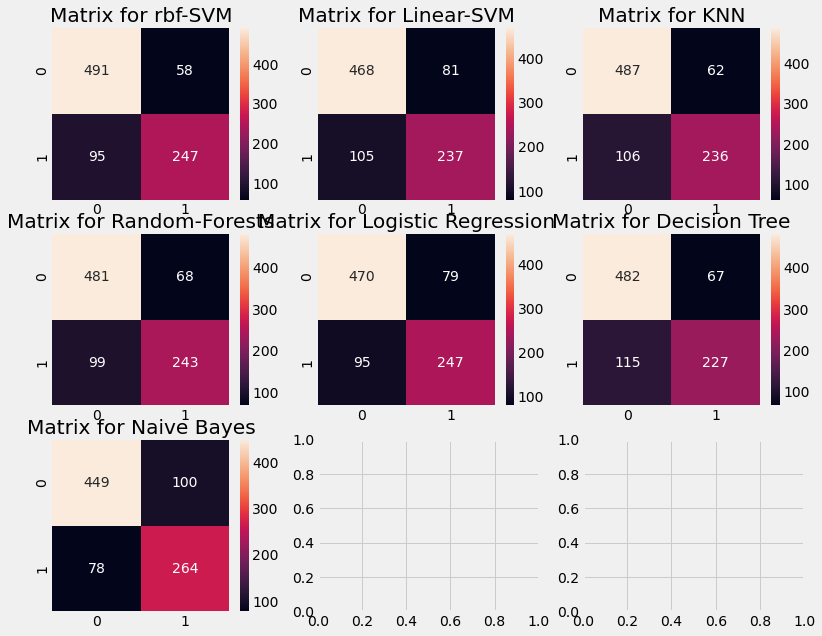

In [59]:
f,ax=plt.subplots(3,3,figsize=(12,10))
y_pred = cross_val_predict(svm.SVC(kernel='rbf'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,0],annot=True,fmt='2.0f')
ax[0,0].set_title('Matrix for rbf-SVM')
y_pred = cross_val_predict(svm.SVC(kernel='linear'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,1],annot=True,fmt='2.0f')
ax[0,1].set_title('Matrix for Linear-SVM')
y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,2],annot=True,fmt='2.0f')
ax[0,2].set_title('Matrix for KNN')
y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('Matrix for Random-Forests')
y_pred = cross_val_predict(LogisticRegression(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,1],annot=True,fmt='2.0f')
ax[1,1].set_title('Matrix for Logistic Regression')
y_pred = cross_val_predict(DecisionTreeClassifier(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,2],annot=True,fmt='2.0f')
ax[1,2].set_title('Matrix for Decision Tree')
y_pred = cross_val_predict(GaussianNB(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[2,0],annot=True,fmt='2.0f')
ax[2,0].set_title('Matrix for Naive Bayes')
plt.subplots_adjust(hspace=0.2,wspace=0.2)
plt.show()

In [60]:
from sklearn.model_selection import GridSearchCV
C=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
gamma=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
kernel=['rbf','linear']
hyper = {'kernel' : kernel, 'C' : C, 'gamma' : gamma}
gd = GridSearchCV(estimator = svm.SVC(), param_grid = hyper, verbose = True)
gd.fit(X, Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
0.8282593685267716
SVC(C=0.4, gamma=0.3)


In [61]:
n_estimators = range(100, 1000, 100)
hyper = {'n_estimators' : n_estimators}
gd = GridSearchCV(estimator = RandomForestClassifier(random_state = 0),
                 param_grid = hyper, verbose = True)
gd.fit(X, Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
0.819327098110602
RandomForestClassifier(n_estimators=300, random_state=0)


In [62]:
#Ensembling
from sklearn.ensemble import VotingClassifier
ensemble_lin_rbf = VotingClassifier(estimators = [
    ('KNN', KNeighborsClassifier(n_neighbors= 10)),
    ('RBF', svm.SVC(probability = True, kernel = 'rbf', C = 0.5, gamma = 0.1)),
    ('RFor', RandomForestClassifier(n_estimators = 500, random_state = 0)),
    ('LR', LogisticRegression(C= 0.05)),
    ('DT', DecisionTreeClassifier(random_state = 0)),
    ('NB', GaussianNB()),
    ('svm', svm.SVC(kernel = 'linear', probability = True))],
                                    voting = 'soft'
).fit(train_X, train_Y)
print('The accuracy for ensemble model is : ', ensemble_lin_rbf.score(test_X, test_Y))
cross = cross_val_score(ensemble_lin_rbf, X, Y, cv = 10, scoring = 'accuracy')
print('The cross validated score is', cross.mean())

The accuracy for ensemble model is :  0.8171641791044776
The cross validated score is 0.8249188514357053


In [63]:
from sklearn.ensemble import BaggingClassifier
model=BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3),random_state=0,n_estimators=700)
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy for bagged KNN is:',metrics.accuracy_score(prediction,test_Y))
result=cross_val_score(model,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for bagged KNN is:',result.mean())

The accuracy for bagged KNN is: 0.832089552238806
The cross validated score for bagged KNN is: 0.8104244694132333


In [64]:
model=BaggingClassifier(base_estimator=DecisionTreeClassifier(),random_state=0,n_estimators=100)
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy for bagged Decision Tree is:',metrics.accuracy_score(prediction,test_Y))
result=cross_val_score(model,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for bagged Decision Tree is:',result.mean())

The accuracy for bagged Decision Tree is: 0.8208955223880597
The cross validated score for bagged Decision Tree is: 0.8171410736579275


In [65]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators = 200, random_state = 0, learning_rate = 0.1)
result = cross_val_score(ada, X, Y, cv= 10, scoring = 'accuracy')
print('The cross validated score for AdaBoost is : ', result.mean())

The cross validated score for AdaBoost is :  0.8249188514357055


In [66]:
from sklearn.ensemble import GradientBoostingClassifier
grad=GradientBoostingClassifier(n_estimators=500,random_state=0,learning_rate=0.1)
result=cross_val_score(grad,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for Gradient Boosting is:',result.mean())

The cross validated score for Gradient Boosting is: 0.8115230961298376


In [67]:
import xgboost as xg
xgboost=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
result=cross_val_score(xgboost,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for XGBoost is:',result.mean())

The cross validated score for XGBoost is: 0.8160299625468165


In [68]:
n_estimators=list(range(100,1100,100))
learn_rate=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
hyper={'n_estimators':n_estimators,'learning_rate':learn_rate}
gd=GridSearchCV(estimator=AdaBoostClassifier(),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
0.8293892411022534
AdaBoostClassifier(learning_rate=0.1, n_estimators=100)


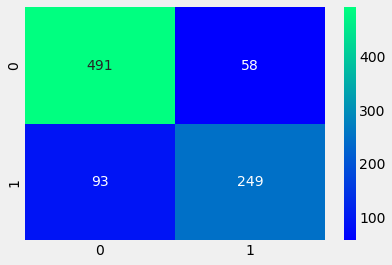

In [69]:
ada=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.05)
result=cross_val_predict(ada,X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,result),cmap='winter',annot=True,fmt='2.0f')
plt.show()

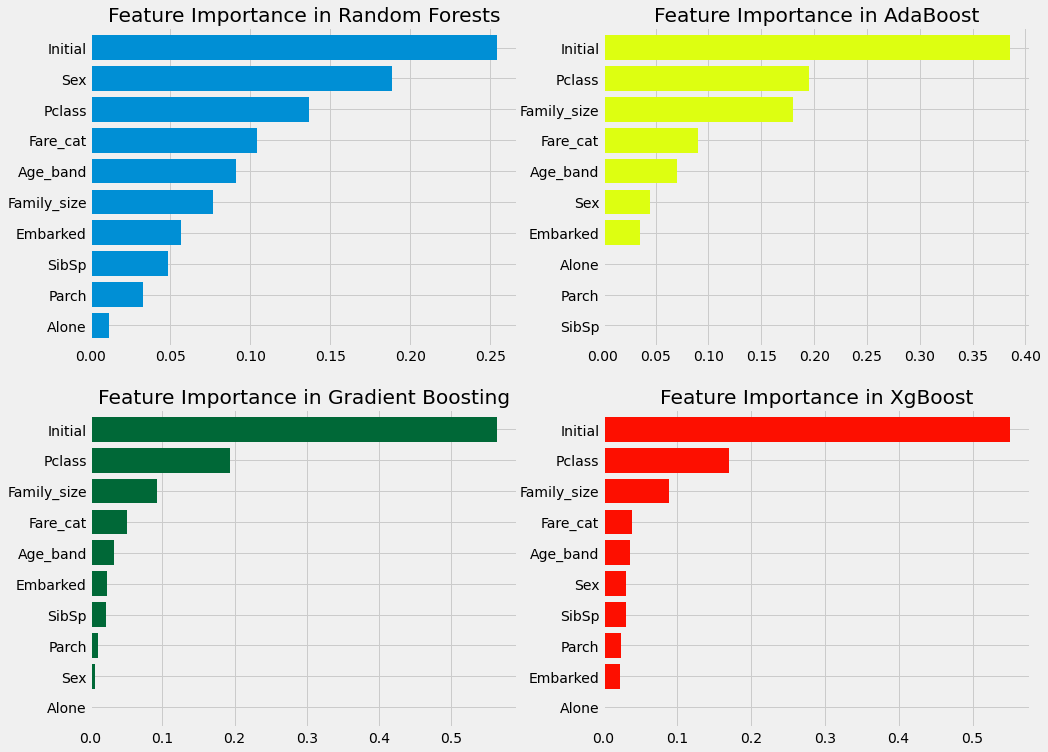

In [70]:
f,ax=plt.subplots(2,2,figsize=(15,12))
model=RandomForestClassifier(n_estimators=500,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,0])
ax[0,0].set_title('Feature Importance in Random Forests')
model=AdaBoostClassifier(n_estimators=200,learning_rate=0.05,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,1],color='#ddff11')
ax[0,1].set_title('Feature Importance in AdaBoost')
model=GradientBoostingClassifier(n_estimators=500,learning_rate=0.1,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,0],cmap='RdYlGn_r')
ax[1,0].set_title('Feature Importance in Gradient Boosting')
model=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,1],color='#FD0F00')
ax[1,1].set_title('Feature Importance in XgBoost')
plt.show()